## sales_strategies_based_on_customer_segments

## Data Wrangling

In [1]:
# Data Wrangling

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib jpn support
import japanize_matplotlib

# dataframe display function
from IPython.display import display

# diaply adjustment
# numpy float display adjustment
np.set_printoptions(suppress = True, precision = 4)

# pandas float display adjustment
pd.options.display.float_format = '{:.4f}'.format

# show all columns of dataframe
pd.set_option('display.max_columns', None)

# default font
plt.rcParams['font.size'] = 12

# set random number
random_seed = 123

### source
Wholesale customers Data Set 

https://archive.ics.uci.edu/ml/datasets/wholesale+customers

## data import and verification

In [2]:
# data import
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(url)

# change columns name into Japanese
columns = ['販売チャネル', '地域', '生鮮食品', '乳製品', '食料品', 
    '冷凍食品', '洗剤_紙製品', '総菜']
df.columns = columns

In [3]:
# data shape
display(df.head())

# sample data
print(df.shape)

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)


In [5]:
# missing value
print(df.isnull().sum())

販売チャネル    0
地域        0
生鮮食品      0
乳製品       0
食料品       0
冷凍食品      0
洗剤_紙製品    0
総菜        0
dtype: int64


In [6]:
# check the sales channel code
print(df['販売チャネル'].value_counts())
print()

# area code
print(df['地域'].value_counts())

1    298
2    142
Name: 販売チャネル, dtype: int64

3    316
1     77
2     47
Name: 地域, dtype: int64


#### 販売チャネルのコード値の意味
1.  Horeca(ホテル・レストラン・カフェ) 298 
2. Retail(小売り) 142 

#### 地域のコード値の意味
1.  Lisbon(リスボン) 77 
2. Oporto(オプルトまたはポルト) 47 
3. Other Region(その他) 316 



### histogram

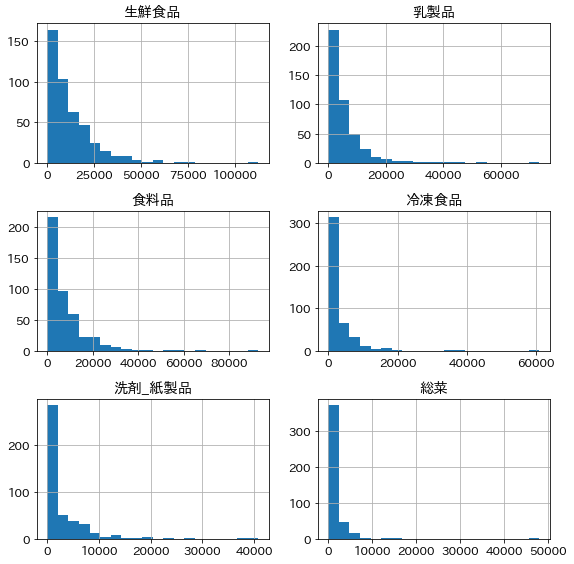

In [7]:
# drop `販売チャネル` and `地域`
df2 = df.drop(['販売チャネル', '地域'], axis=1)

# histogram
from pylab import rcParams
rcParams['figure.figsize'] = (8, 8)
df2.hist(bins=20)
plt.tight_layout() 
plt.show()

## clustering

In [8]:
# no need of data preprocessing and data split

# algorithm selection
from sklearn.cluster import KMeans

# set groups number
clusters=4

# define algorithm
algorithm = KMeans(n_clusters=clusters, 
    random_state=random_seed)

In [9]:
# learning and prediction
y_pred = algorithm.fit_predict(df2)

# result
print(y_pred[:20])

[1 2 1 1 0 1 1 1 1 2 2 1 0 2 0 1 2 1 1 1]


### results of clustering

#### average by group

In [10]:
# average by group
df_cluster = df2.groupby(y_pred).mean()
display(df_cluster)

,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,36144.4828,5471.4655,6128.7931,6298.6552,1064.0000,2316.7241
1,9087.4638,3027.4275,3753.5145,2817.9855,1003.0036,1040.5254
2,4808.8421,10525.0105,16909.7895,1462.5895,7302.4000,1650.8842
3,19888.2727,36142.3636,45517.4545,6328.9091,21417.0909,8414.0000


#### barplot by group

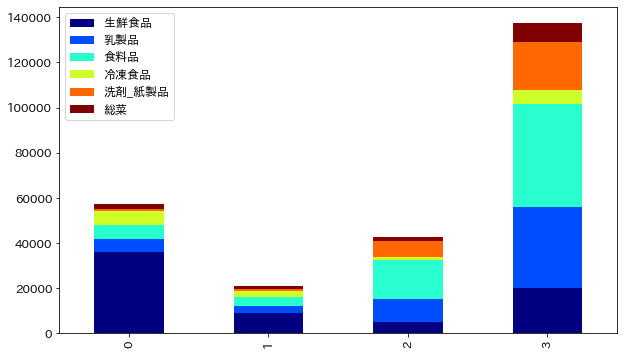

In [11]:
# bar plot by group
df_cluster.plot(kind='bar',stacked=True,
    figsize=(10, 6),colormap='jet')
plt.show()

#### 分析結果

* **0**: 生鮮食品中心
* **1**: 少量購入
* **2**: 食料品中心
* **3**: 大量購入

#### relationship of clusters to sales channels & area

==== Group0 ====


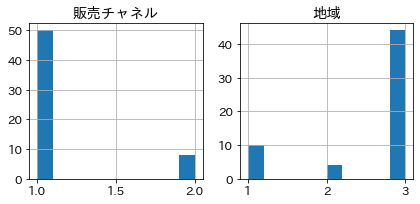

==== Group1 ====


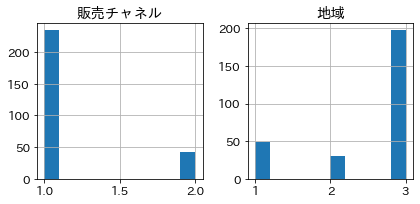

==== Group2 ====


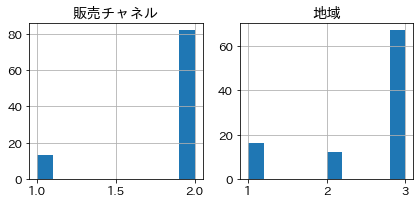

==== Group3 ====


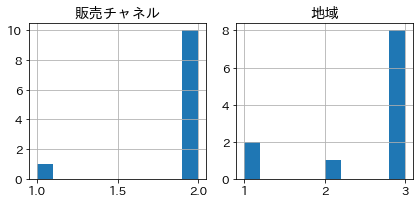

In [13]:
# check the relationship of each groups to sales_channels and area

# extract `販売チャネル` and `area`
df3 = df[['販売チャネル', '地域']]

# graph size
rcParams['figure.figsize'] = (6,3)

# graph display by group
for i in range(clusters):
    fig, ax = plt.subplots()
    w = df3[y_pred==i]
    print(f'==== Group{i} ====')
    w.hist(ax=ax)
    plt.tight_layout()
    plt.show()

#### 分析結果
グループ0(生鮮)とグループ1(少量)は、チャネル1(Horeca)と関連が深い。   
グループ2(食品)とグループ3(大量)は、チャネル2(Retail)と関連が深い。  
地域とグループの関連は時に見いだせない。

## dimensionality reduction

In [14]:
# algorithm selection
from sklearn.decomposition import PCA

# model generation
# reduce the dimension to 2D for scatter plot
pca = PCA(n_components=2)

In [15]:
# learning and transforming
d2 = pca.fit_transform(df2)

# results
print(d2[:5,:])

[[  650.0221  1585.5191]
 [-4426.805   4042.4515]
 [-4841.9987  2578.7622]
 [  990.3464 -6279.806 ]
 [10657.9987 -2159.7258]]


### application of dimensionality reduction

#### scatter plot

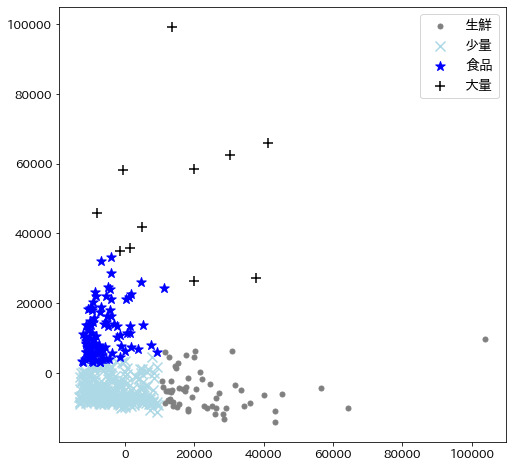

In [16]:
# scatter plot by group

plt.figure(figsize=(8,8))
marks = ['.', 'x', '*', '+']
labels = ['生鮮', '少量', '食品', '大量']
colors = ['grey', 'lightblue', 'blue', 'black']
for i in range(clusters):
  plt.scatter(d2[y_pred==i][:,0], d2[y_pred==i][:,1], 
    marker=marks[i], label=labels[i], s=100, c=colors[i])
plt.legend(fontsize=14)
plt.show()

#### outlier analysis

In [17]:
# check the outliers of 生鮮グループ
display(df[d2[:,0] > 100000])

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
181,1,3,112151,29627,18148,16745,4948,8550


[Disucission]\
customer with index 181 especially purchases `生鮮食品`

In [ ]:
# check the outliers of 大量グループ
display(df[d2[:,1] > 80000])

[Discussion]\
customer with index 85 especially purchase `食料品` and `洗剤・紙製品`

In [18]:
# stats
display(df2.describe())

,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
count,440.0000,440.0000,440.0000,440.0000,440.0000,440.0000
mean,12000.2977,5796.2659,7951.2773,3071.9318,2881.4932,1524.8705
std,12647.3289,7380.3772,9503.1628,4854.6733,4767.8544,2820.1059
min,3.0000,55.0000,3.0000,25.0000,3.0000,3.0000
25%,3127.7500,1533.0000,2153.0000,742.2500,256.7500,408.2500
50%,8504.0000,3627.0000,4755.5000,1526.0000,816.5000,965.5000
75%,16933.7500,7190.2500,10655.7500,3554.2500,3922.0000,1820.2500
max,112151.0000,73498.0000,92780.0000,60869.0000,40827.0000,47943.0000
